# House prediction using ML

## Table of Contents

1. Environment Setup and Data Loading
2. Data Pre-Processing
3. Exploratory Data Analysis
4. Data Cleaning and Transformation
5. Model Building

## 1. Environment Setup and Data Loading

This section mainly imports the required libraries we'll need later on + loading the data into our working environment. Please refer to the comments for specific explanations regarding the code

In [1]:
# load in the libraries

# data manipulation libraries
import pandas as pd
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# base libraries
import os
import time


# do not print warnings
import warnings
warnings.filterwarnings("ignore")

# intel patch for faster processing
from sklearnex import patch_sklearn
patch_sklearn()

# for displaying tabular format
from IPython.display import display

#Global set to view all columns
pd.set_option('display.max_columns', None)

# we will be importing more as we go on as it becomes required

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# change our working directory (where our files will be)
os.chdir(r'M:\Msc Business Analytics\Semester 2\Data Mining and Web Analytics\Coursework\Dataset')

In [3]:
# load in the file
# we set the first row of the csv as the header and the first column (id) as our index
file = pd.read_csv('CW_training_final.csv', header=0, index_col=0)
guide = pd.read_excel('Metadata.xlsx', header=0)

In [4]:
# inspect the first 5 rows of our loaded in dataframe
file.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1,Gd,8.0,Typ,0.0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0,0.0,0,NaN,NaN,NaN,0,2.0,2008.0,WD,Normal,208500.0
2,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0,0.0,0,NaN,NaN,NaN,0,5.0,2007.0,WD,Normal,181500.0
3,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0,0.0,0,NaN,NaN,NaN,0,9.0,2008.0,WD,Normal,223500.0
4,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0,0.0,0,NaN,NaN,NaN,0,12.0,2008.0,WD,Normal,250000.0
5,50.0,RL,85.0,14115.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5.0,5.0,1993.0,1995.0,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796.0,566.0,0.0,1362.0,1.0,0.0,1.0,1.0,1.0,1,TA,5.0,Typ,0.0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40.0,30.0,0.0,320,0.0,0,NaN,MnPrv,Shed,700,10.0,2009.0,WD,Normal,143000.0


Great, our data is loaded in now time to do some initial data processing

## 2. Data Pre-Processing

In this section we'll be implementing some initial data pre-processinng steps (before the transformation and all that) such as:
- Selecting the variables we need from the whole dataset
- Mapping the proper categorical labels to the variables so it's more intuitive
- Convert all variables to their correct type
- Split our dataset into training and test sets before exploration

### 2.1 Variable Selection

Here we'll take only the columns (variables we need) from the full dataset. The columns we are taking is based on the initial exploration and modeling (not included in this file). Some criteria for determining which variables we picked and did not are as follows:

- Overall, all variables with subjective measures of quality (such as overall condition) have not been selected
- Only variables that would be known at the real estate planning phase are selected
- Amongst these variables, an initial random forest model was created and feature importance from the resulting model informed our selection

In [5]:
file.shape

(1144, 80)

In [6]:
# The below code removes all the columns we think we dont necessarily need

# print shape of our dataset before removing columns
print(file.shape)

# we assign a list with all the columns we require (the ones we're keeping)
features_to_keep = ['LotArea', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 
            'GarageArea', 'Foundation', 'MSSubClass', 'Condition1', 'SalePrice', 'GarageType']

# next we run a loop over the accidents dataset to only keep columns in the previous list
for column in file:
    if column not in features_to_keep:
        del file[column]


# print shape of our dataset after removing columns
print(file.shape)

(1144, 80)
(1144, 11)


In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144 entries, 1 to 1144
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1144 non-null   float64
 1   LotArea       1144 non-null   float64
 2   Condition1    1144 non-null   object 
 3   Foundation    1144 non-null   object 
 4   GrLivArea     1144 non-null   float64
 5   FullBath      1144 non-null   float64
 6   TotRmsAbvGrd  1144 non-null   float64
 7   GarageType    1091 non-null   object 
 8   GarageCars    1144 non-null   float64
 9   GarageArea    1144 non-null   float64
 10  SalePrice     1144 non-null   float64
dtypes: float64(8), object(3)
memory usage: 107.2+ KB


We can notice above that despite being a categorical variable, the variable type of MSSubClass is set to Float (numerical), so we'll change the type to the correct one.

In [8]:
# change MSSubClass variable type
file['MSSubClass'] = file['MSSubClass'].astype(object) 

### 2.2 Mapping the Categorical Variables

Right now we can see that our data has numbers or abbreviations that stand for actual labels in some of the categorical variables. It makes more sense going forward to actually see and know what those values stand for. So this part is all about mapping them to their actual labels

In [9]:
# select the categorical variables we will be mapping
catvar = file.select_dtypes(['object']).columns.tolist()

# get the label data as a grouped object from the data guide
grouped = guide.groupby(guide['column'])

# define a function to create individual dictionaries for each categorical variable and value pair
def getfunc(object, column):
    
    # gets the group corresponding to the categorical column and drops non-required columns
    x = object.get_group(column).drop(columns=['column'])

    # convert the object to a dictionary with only the code/format and label columns remaining
    x = x.set_index('value')['label'].to_dict()

    return x 

# we can use this function for all of our datasets

In [10]:
# run the function over all columns we are keeping
# this will replace the existing values with the intuitive labels 
for column in catvar:
    file[column] = file[column].map(getfunc(grouped, column))

In [11]:
file.head()

,MSSubClass,LotArea,Condition1,Foundation,GrLivArea,FullBath,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,SalePrice
id,,,,,,,,,,,
1,2-STORY 1946 & NEWER,8450.0,Normal,Poured Contrete,1710.0,2.0,8.0,Attached to home,2.0,548.0,208500.0
2,1-STORY 1946 & NEWER ALL STYLES,9600.0,Adjacent to feeder street,Cinder Block,1262.0,2.0,6.0,Attached to home,2.0,460.0,181500.0
3,2-STORY 1946 & NEWER,11250.0,Normal,Poured Contrete,1786.0,2.0,6.0,Attached to home,2.0,608.0,223500.0
4,2-STORY 1946 & NEWER,14260.0,Normal,Poured Contrete,2198.0,2.0,9.0,Attached to home,3.0,836.0,250000.0
5,1-1/2 STORY FINISHED ALL AGES,14115.0,Normal,Wood,1362.0,1.0,5.0,Attached to home,2.0,480.0,143000.0


As we can see now we have data that makes more sense than the abbreviations used earlier. We will proceed to do some Exploratory Data Analysis on this. But before that, we will split the dataset into training and test sets to ensure we do not do any data-snooping.

### 2.3 Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

# split our data into train and test sets
# the test set will be 20% of our dataset
trainset, testset = train_test_split(file, test_size=0.2, random_state=7)

In [13]:
print(trainset.shape, testset.shape)

(915, 11) (229, 11)


We can see we have 900 records in the training set and 200 records in the testing or validation set. 

## 3. Exploratory Data Analysis

In [14]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 1060 to 176
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    852 non-null    object 
 1   LotArea       915 non-null    float64
 2   Condition1    915 non-null    object 
 3   Foundation    915 non-null    object 
 4   GrLivArea     915 non-null    float64
 5   FullBath      915 non-null    float64
 6   TotRmsAbvGrd  915 non-null    float64
 7   GarageType    915 non-null    object 
 8   GarageCars    915 non-null    float64
 9   GarageArea    915 non-null    float64
 10  SalePrice     915 non-null    float64
dtypes: float64(7), object(4)
memory usage: 85.8+ KB


### Uni-Variate - Looking at Sales Price

Text(0.5, 1.0, 'Distribution of Sales Price')

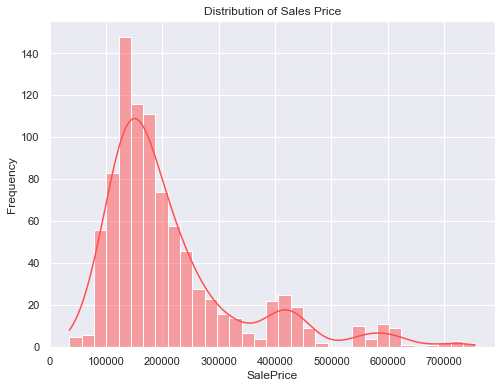

In [15]:
# histogram of the numerical sales price variable
sns.set_theme(style='darkgrid', palette='deep')

sns.set(rc={'figure.figsize':(8,6)})

# plot the histogram
ax = sns.histplot(data=trainset, x='SalePrice', color='#ff5050', kde=True)
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sales Price')

In [16]:
print(np.mean(trainset['SalePrice']))
print(np.median(trainset['SalePrice']))
print(np.std(trainset['SalePrice']))

215234.1017673224
175000.0
126362.18893415976


### Bi-Variate (House Prices and Foundation Type)

Text(0.5, 1.0, 'Average House Price by Foundation Type')

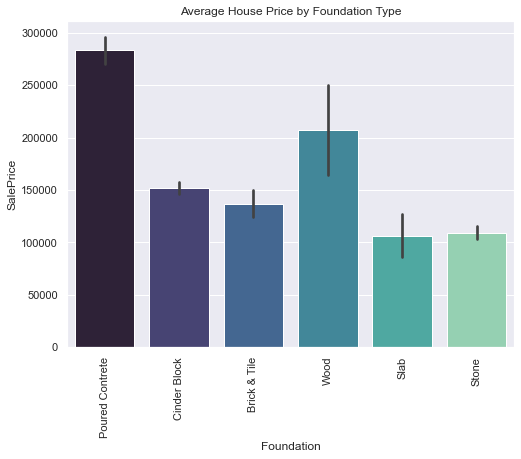

In [17]:
# visualizing Average House Price by Foundation Type
ax = sns.barplot(data=trainset, y='SalePrice', x='Foundation', palette='mako')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Average House Price by Foundation Type')

### Count of Categorical Variables

Text(0.5, 1.0, 'Total number of houses by Foundation Type')

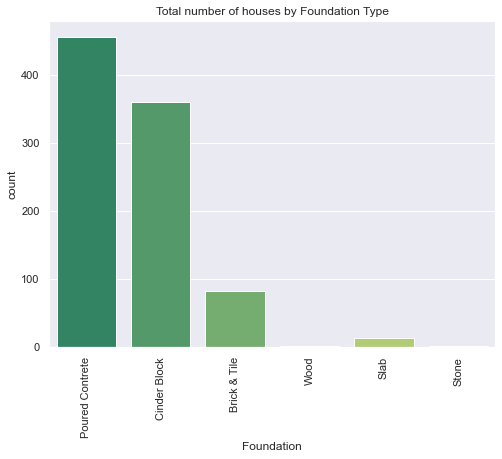

In [18]:
# getting the total count of houses by respective foundation type
ax = sns.countplot(data=trainset, x='Foundation', palette='summer')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Total number of houses by Foundation Type')

### ScatterPlot - House Price vs Lot Area

Text(0.5, 1.0, 'Sale Price of Property against Lot Area')

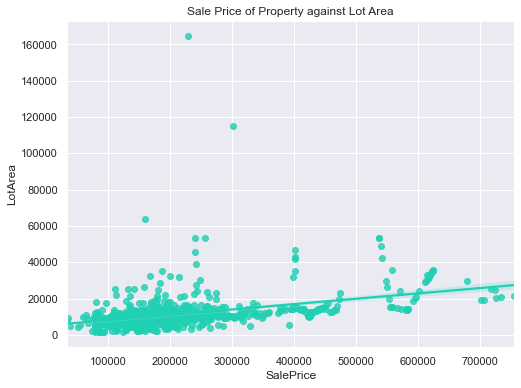

In [19]:
# do a scatter plot to visualize any potential relationship with area and Sale Price
ax = sns.regplot(data=trainset, x='SalePrice', y='LotArea', color='#20d0b2')

ax.set_title('Sale Price of Property against Lot Area')

Text(0.5, 1.0, 'Sale Price of Property against Living Area')

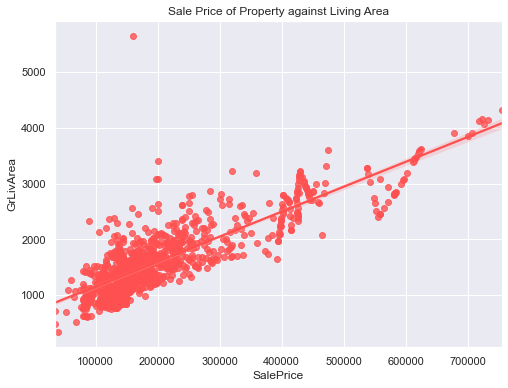

In [20]:
# do a scatter plot to visualize any potential relationship with area and Sale Price
ax = sns.regplot(data=trainset, x='SalePrice', y='GrLivArea', color='#ff5050')

ax.set_title('Sale Price of Property against Living Area')

### Histogram Matrix for all Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CBD7DDC6D0>,
      dtype=object)

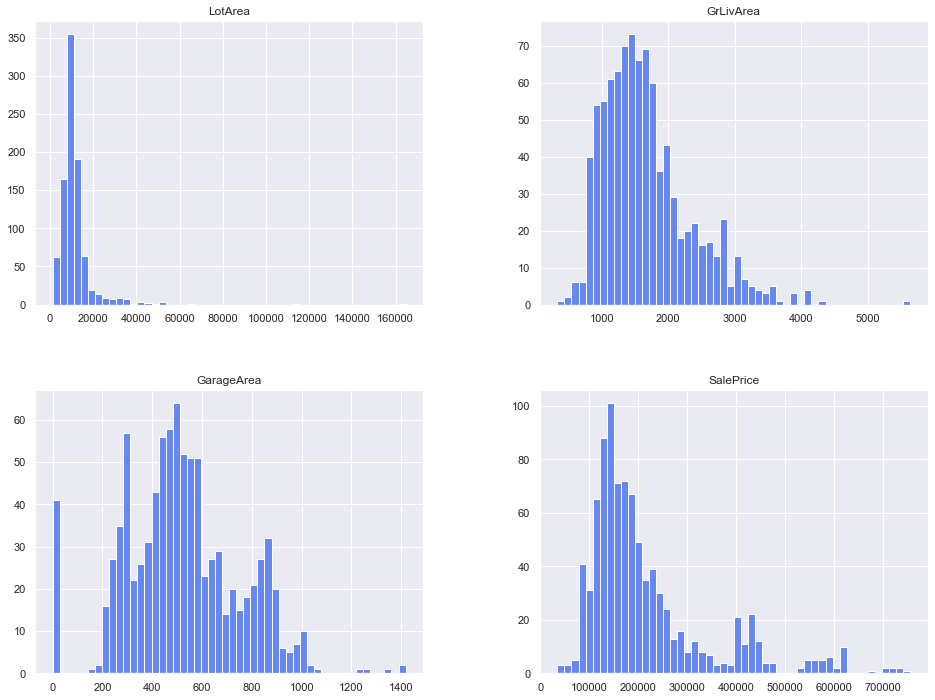

In [21]:
# set seaborn theme
sns.set_theme(style='darkgrid', palette='coolwarm')

# drop the longitude and latitude numerical variables as they represent geographical data
numerical_vis = trainset.drop(columns=['TotRmsAbvGrd', 'GarageCars', 'FullBath'])

# plot a histogram containing all numerical variables in the dataset.
numerical_vis.hist(bins=50, figsize=(16,12), histtype='bar')


### Scatterplot matrix for all Numerical Variables

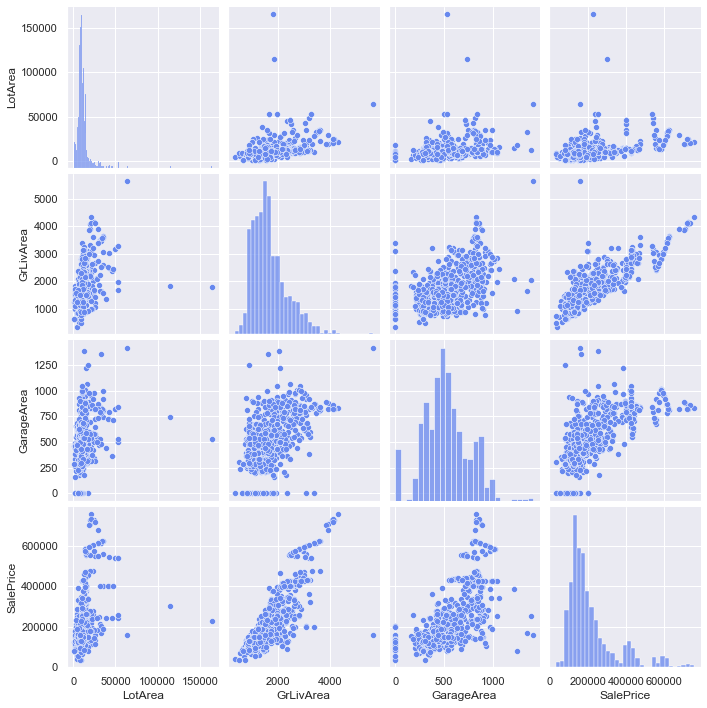

In [22]:
# do a scatterplot matrix with all the numerical variables to identify potential anomalies
sns.pairplot(numerical_vis)


### Categorical Variable visualization

In [23]:
# assign a dataframe with all of our missing values
catvar = trainset[['MSSubClass', 'Foundation']]

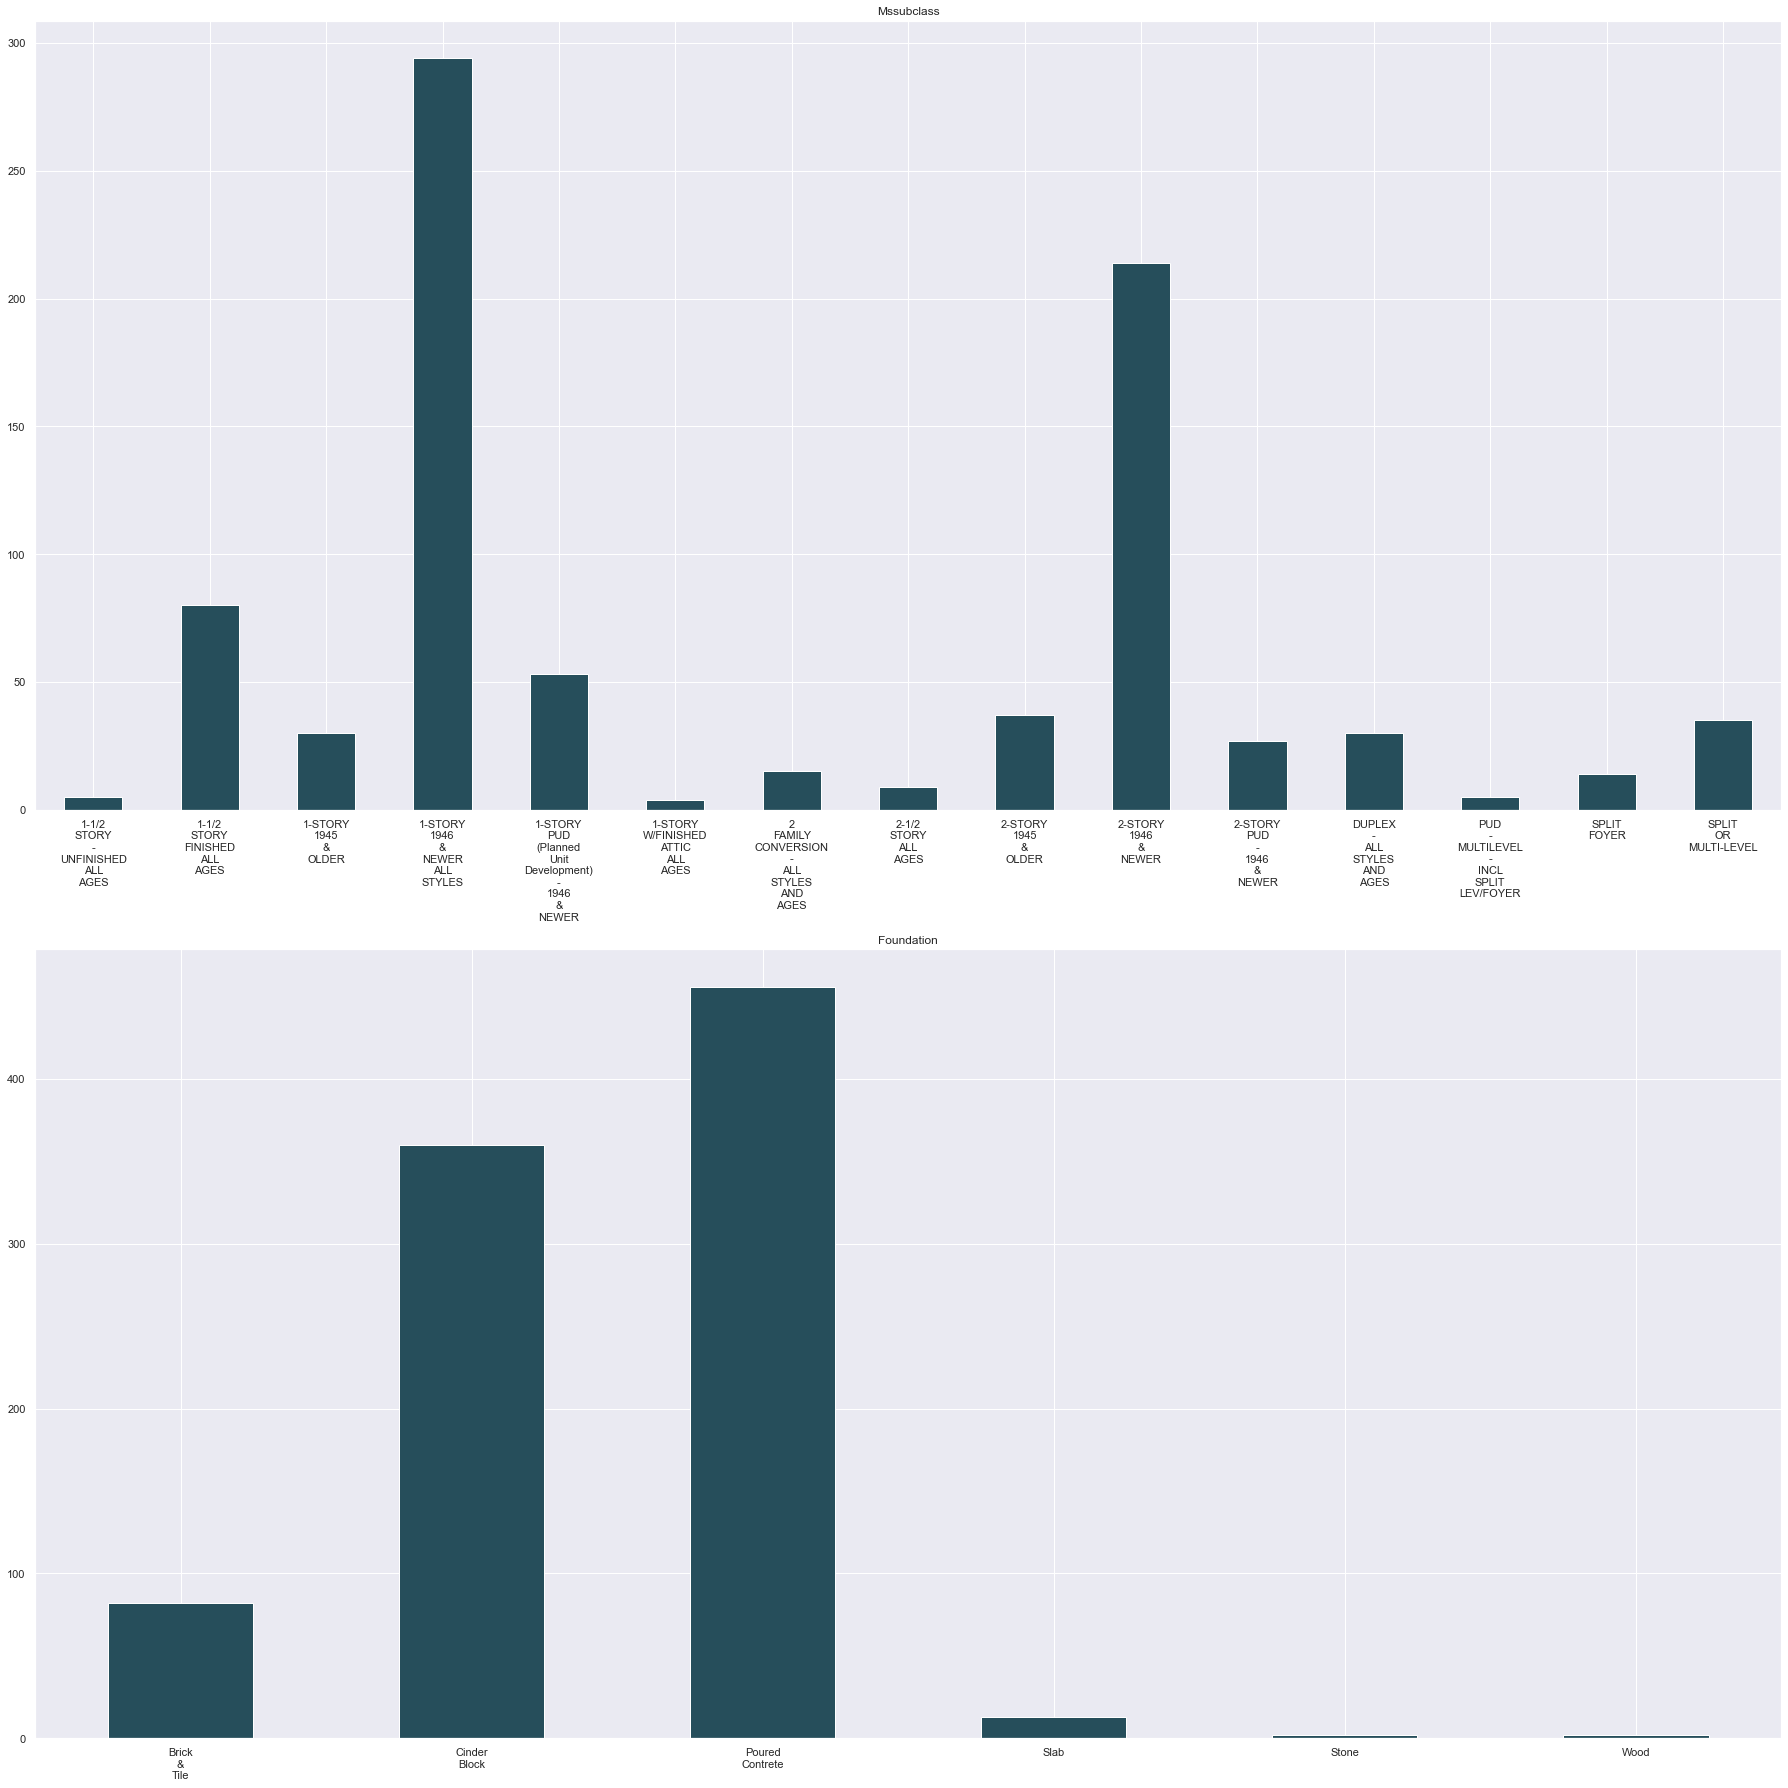

In [24]:
# import the required libraries
from matplotlib import rc
import matplotlib.pyplot as plt


# we call the subplot method to create one plot including many different ones
fig, axes = plt.subplots(ncols=1, nrows=catvar.shape[1], figsize=(25,25))


for col, ax in zip(catvar.columns, np.ravel(axes)):
    catvar[col] = catvar[col].str.replace(" ", "\n")
    catvar[col].value_counts(sort=False).sort_index().plot(
        kind='bar', ax=ax, color='#264e5b', rot=0,
        title=col.replace("_", " ").title(),
    )


plt.tight_layout()
plt.show()
plt.clf()
plt.close()

## 4. Data Cleaning

We will be cleaning and transforming our dataset to ensure data quality in this section. This includes:
- Handling Missing Values
- Handling Outliers
- Identifying and Treating any Anomalous Data

### 4.1 Missing Values

In [25]:
# lets see how much missing data we have
trainset.isnull().sum()

MSSubClass      63
LotArea          0
Condition1       0
Foundation       0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageType       0
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64

It seems we only have missing variables in the MSSSubClass variable. We need to treat this missing value so we'll impute the value with the most frequent class in the variable

In [26]:
# import the SimpleImputer class and instantiate the object
from sklearn.impute import SimpleImputer

# instantiate imputer object with mode (most frequent) set as the strategy
imputer = SimpleImputer(strategy ='most_frequent')


# define a function that imputes missing values on a given train,test dataset pair.
def imputefunc(trainset, testset):

    # fit the impute on our training set and subsequently transform both sets
    trainset = pd.DataFrame(imputer.fit_transform(trainset),columns = trainset.columns)
    testset = pd.DataFrame(imputer.transform(testset), columns = testset.columns)
    
    # reset the index of both our sets as concatenation requires consistent indexes
    trainset.reset_index(level=0, inplace=True)
    trainset.reset_index(level=0, inplace=True)  
    
    return trainset, testset


trainset, testset = imputefunc(trainset, testset)

In [27]:
trainset.isnull().sum()

level_0         0
index           0
MSSubClass      0
LotArea         0
Condition1      0
Foundation      0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageType      0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

We now have a dataset with no missing values, we'll now proceed with handling anomalous data

### 4.2 Anomalies

In this part we're going to be removing the anomalous data that we have

In [28]:
# our only anomalies identified have been thus far the Lot Area so we'll remove the anomalies
# for the removal of anomalies we'll use a simple rule, any record with a lot area bigger than 100,000sq ft
trainset = trainset[trainset.LotArea < 100000]

In [29]:
# by inspecting the shape we can see that we've removed two records that were above 100,000 sq ft
trainset.shape

(913, 13)

In [30]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 914
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   level_0       913 non-null    int64 
 1   index         913 non-null    int64 
 2   MSSubClass    913 non-null    object
 3   LotArea       913 non-null    object
 4   Condition1    913 non-null    object
 5   Foundation    913 non-null    object
 6   GrLivArea     913 non-null    object
 7   FullBath      913 non-null    object
 8   TotRmsAbvGrd  913 non-null    object
 9   GarageType    913 non-null    object
 10  GarageCars    913 non-null    object
 11  GarageArea    913 non-null    object
 12  SalePrice     913 non-null    object
dtypes: int64(2), object(11)
memory usage: 99.9+ KB


Another anomaly we can note upon closer inspection of the data is that some integer variables are  in float, they appear to have decimal places (although we cannot have fractions of rooms or fireplaces in houses). To treat this, we'll see how many records are there. If there's many, we'll convert them to the nearest integer rather than removing, as we'd be losing too much information. 

In [31]:
# lets define a simple function that sets the variable type to integer for specified columns
def intfunc(dataframe, column):
    dataframe[column] = dataframe[column].astype(int)
    
    return dataframe

# now lets set a list of all the columns we want to be integers
intcol = ['TotRmsAbvGrd', 'GarageCars', 'FullBath']

# now we run a loop over the dataframe and apply the function on the training set
for column in trainset:
    if column in intcol:
        intfunc(trainset, column)


# lets also do the same on the testset
for column in testset:
    if column in intcol:
        intfunc(testset, column)

In [32]:
trainset[intcol].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 914
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TotRmsAbvGrd  913 non-null    int32
 1   GarageCars    913 non-null    int32
 2   FullBath      913 non-null    int32
dtypes: int32(3)
memory usage: 17.8 KB


In [33]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 914
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   level_0       913 non-null    int64 
 1   index         913 non-null    int64 
 2   MSSubClass    913 non-null    object
 3   LotArea       913 non-null    object
 4   Condition1    913 non-null    object
 5   Foundation    913 non-null    object
 6   GrLivArea     913 non-null    object
 7   FullBath      913 non-null    int32 
 8   TotRmsAbvGrd  913 non-null    int32 
 9   GarageType    913 non-null    object
 10  GarageCars    913 non-null    int32 
 11  GarageArea    913 non-null    object
 12  SalePrice     913 non-null    object
dtypes: int32(3), int64(2), object(8)
memory usage: 89.2+ KB


In [34]:
# now lets look at the actual value 
trainset.head()

,level_0,index,MSSubClass,LotArea,Condition1,Foundation,GrLivArea,FullBath,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,SalePrice
0,0,0,1-STORY 1946 & NEWER ALL STYLES,15132.12751,Normal,Poured Contrete,2788.713467,2,9,Attached to home,3,810.547327,402948.4869
1,1,1,SPLIT FOYER,8846.0,Normal,Poured Contrete,914.0,1,5,Detached from home,2,576.0,148000.0
2,2,2,1-STORY 1946 & NEWER ALL STYLES,49121.80826,Normal,Poured Contrete,3178.057543,2,11,Built-In (Garage part of house - typically has...,3,821.548147,539956.6953
3,3,3,1-STORY 1946 & NEWER ALL STYLES,8400.0,Normal,Cinder Block,1537.0,1,7,Attached to home,2,462.0,174000.0
4,4,4,2-STORY 1946 & NEWER,31032.75146,Normal,Poured Contrete,3452.989525,3,10,Attached to home,3,853.042523,615906.7098


We dont seem to have any more integers so all looks good. Now we can proceed with the next section

### 4.3 Feature Engineering

Here we'll engineer some features. Feature engineering can help increase the information value of variables as well as compress the data (in a computational sense)

In [35]:
# lets inspect the data first to see what features we could perhaps include
trainset.head()

,level_0,index,MSSubClass,LotArea,Condition1,Foundation,GrLivArea,FullBath,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,SalePrice
0,0,0,1-STORY 1946 & NEWER ALL STYLES,15132.12751,Normal,Poured Contrete,2788.713467,2,9,Attached to home,3,810.547327,402948.4869
1,1,1,SPLIT FOYER,8846.0,Normal,Poured Contrete,914.0,1,5,Detached from home,2,576.0,148000.0
2,2,2,1-STORY 1946 & NEWER ALL STYLES,49121.80826,Normal,Poured Contrete,3178.057543,2,11,Built-In (Garage part of house - typically has...,3,821.548147,539956.6953
3,3,3,1-STORY 1946 & NEWER ALL STYLES,8400.0,Normal,Cinder Block,1537.0,1,7,Attached to home,2,462.0,174000.0
4,4,4,2-STORY 1946 & NEWER,31032.75146,Normal,Poured Contrete,3452.989525,3,10,Attached to home,3,853.042523,615906.7098


Lets combine the Lot Area feature with the Total Rooms feature. Rather than using both seperately, we can check whether properties with a higher ratio of area per room (less density of rooms) have higher values

For this we'll create a new column that is 
> Living Area /Total Rooms 

In [36]:
# divide lot area and number of rooms to give us the area per room
trainset['Area/Room Ratio'] = trainset['GrLivArea']/trainset['TotRmsAbvGrd']
testset['Area/Room Ratio'] = testset['GrLivArea']/testset['TotRmsAbvGrd']

Good, now we have a new engineered feature

We'll have to fix the issue that occurs following imputing where the variable type of numerical variables is set to object

In [37]:
# take all the numerical variables we want to convert to float
numerical_var = ['LotArea', 'GrLivArea', 'GarageArea', 'SalePrice', 'Area/Room Ratio']


# convert each of these variables in the trainset to a float type
for column in trainset:
    if column in numerical_var:
        trainset[column] = trainset[column].astype(float)


# convert each of these variables in the trainset to a float type
for column in testset:
    if column in numerical_var:
        testset[column] = testset[column].astype(float)


In [38]:
# verify if everything is in order
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 914
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   level_0          913 non-null    int64  
 1   index            913 non-null    int64  
 2   MSSubClass       913 non-null    object 
 3   LotArea          913 non-null    float64
 4   Condition1       913 non-null    object 
 5   Foundation       913 non-null    object 
 6   GrLivArea        913 non-null    float64
 7   FullBath         913 non-null    int32  
 8   TotRmsAbvGrd     913 non-null    int32  
 9   GarageType       913 non-null    object 
 10  GarageCars       913 non-null    int32  
 11  GarageArea       913 non-null    float64
 12  SalePrice        913 non-null    float64
 13  Area/Room Ratio  913 non-null    float64
dtypes: float64(5), int32(3), int64(2), object(4)
memory usage: 96.3+ KB


In [39]:
# set the index values
dropcols = [0,1]

# remove the level0 and index variables from the trainset
trainset.drop(trainset.columns[dropcols], axis=1, inplace=True)

In [40]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 914
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       913 non-null    object 
 1   LotArea          913 non-null    float64
 2   Condition1       913 non-null    object 
 3   Foundation       913 non-null    object 
 4   GrLivArea        913 non-null    float64
 5   FullBath         913 non-null    int32  
 6   TotRmsAbvGrd     913 non-null    int32  
 7   GarageType       913 non-null    object 
 8   GarageCars       913 non-null    int32  
 9   GarageArea       913 non-null    float64
 10  SalePrice        913 non-null    float64
 11  Area/Room Ratio  913 non-null    float64
dtypes: float64(5), int32(3), object(4)
memory usage: 82.0+ KB


### 4.4 Dummy Variables - Encoding

In [41]:
# import the onehotencoder class to implement encoding
from sklearn.preprocessing import OneHotEncoder


# set aside the categorical columns as a list object 
catcols = trainset.select_dtypes(['object']).columns.tolist()

# define the get dummies function to return encoded train and test sets
def get_dummies(trainset, testset, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    # the old_col_name will be taken from the categorical columns list defined previously
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        trainset[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the testset dataframe
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in catcols:
    trainset, testset = get_dummies(trainset, testset, col_name)

# check if the dummies are produced correctly in the trainset
trainset.head()

,MSSubClass,LotArea,Condition1,Foundation,GrLivArea,FullBath,TotRmsAbvGrd,GarageType,GarageCars,GarageArea,SalePrice,Area/Room Ratio,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,Adjacent to North-South Railroad,Adjacent to arterial street,Adjacent to feeder street,Adjacent to postive off-site feature,"Near positive off-site feature--park, greenbelt, etc.",Normal,Within 200' of East-West Railroad,Within 200' of North-South Railroad,Cinder Block,Poured Contrete,Slab,Stone,Wood,Basement Garage,Built-In (Garage part of house - typically has room above garage),Car Port,Detached from home,More than one type of garage,No Garage
0,1-STORY 1946 & NEWER ALL STYLES,15132.12751,Normal,Poured Contrete,2788.713467,2,9,Attached to home,3,810.547327,402948.4869,309.857052,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,SPLIT FOYER,8846.00000,Normal,Poured Contrete,914.000000,1,5,Detached from home,2,576.000000,148000.0000,182.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1-STORY 1946 & NEWER ALL STYLES,49121.80826,Normal,Poured Contrete,3178.057543,2,11,Built-In (Garage part of house - typically has...,3,821.548147,539956.6953,288.914322,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1-STORY 1946 & NEWER ALL STYLES,8400.00000,Normal,Cinder Block,1537.000000,1,7,Attached to home,2,462.000000,174000.0000,219.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2-STORY 1946 & NEWER,31032.75146,Normal,Poured Contrete,3452.989525,3,10,Attached to home,3,853.042523,615906.7098,345.298952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# with our dummy variables in place, we no longer need old columns
def dropfunc(data, column_list):
    for column in data:
        if column in column_list:
            del data[column]

# implement the above function on the categorical columns list previously defined
dropfunc(trainset, catcols)
dropfunc(testset, catcols)

trainset.head()

,LotArea,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,Area/Room Ratio,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,Adjacent to North-South Railroad,Adjacent to arterial street,Adjacent to feeder street,Adjacent to postive off-site feature,"Near positive off-site feature--park, greenbelt, etc.",Normal,Within 200' of East-West Railroad,Within 200' of North-South Railroad,Cinder Block,Poured Contrete,Slab,Stone,Wood,Basement Garage,Built-In (Garage part of house - typically has room above garage),Car Port,Detached from home,More than one type of garage,No Garage
0,15132.12751,2788.713467,2,9,3,810.547327,402948.4869,309.857052,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8846.00000,914.000000,1,5,2,576.000000,148000.0000,182.800000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,49121.80826,3178.057543,2,11,3,821.548147,539956.6953,288.914322,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8400.00000,1537.000000,1,7,2,462.000000,174000.0000,219.571429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31032.75146,3452.989525,3,10,3,853.042523,615906.7098,345.298952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Good, now we have a dataset that is fully ready for analysis, before we proceed withh model building we have one last thing, which is scaling.

### 4.5 Feature Scaling

Many ML algorithms do not perform well on variables with significantly different magnitudes of scale. We'll proceed to scale our data using the Robust scaler, which is a scaling method that helps alleviate the issue of outliers by scaling the data according to the Interquantile range. Particularly the range between the 1st, and 3rd quantile.

In [43]:
# with our fully transformed data and such, lets do feature scaling
# import the standard scaler class and instantiate the object
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

# seperate into predictor and target sets, we do not scale our target
trainset_target = trainset["SalePrice"].values
# we do not include and scale date + accident index as part of modelling going forward
trainset_predictors = trainset.drop(columns=["SalePrice"], axis=1)

# call the fit and transform method on our predictors
scaled_vals = scaler.fit_transform(trainset_predictors)

# put the scaled values back into the trainset dataframe
trainset = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target back in
trainset['SalePrice'] = trainset_target

# inspect the data
trainset.head()

,LotArea,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Area/Room Ratio,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,Adjacent to North-South Railroad,Adjacent to arterial street,Adjacent to feeder street,Adjacent to postive off-site feature,"Near positive off-site feature--park, greenbelt, etc.",Normal,Within 200' of East-West Railroad,Within 200' of North-South Railroad,Cinder Block,Poured Contrete,Slab,Stone,Wood,Basement Garage,Built-In (Garage part of house - typically has room above garage),Car Port,Detached from home,More than one type of garage,No Garage,SalePrice
0,1.140851,1.613033,0.0,1.0,1.0,1.082046,1.203875,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,402948.4869
1,-0.214794,-0.802835,-1.0,-1.0,0.0,0.264808,-0.844056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,148000.0000
2,8.470953,2.114765,0.0,2.0,1.0,1.120377,0.866315,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,539956.6953
3,-0.310977,0.000000,-1.0,0.0,0.0,-0.132404,-0.251367,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174000.0000
4,4.569927,2.469059,1.0,1.5,1.0,1.230113,1.775134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,615906.7098


In [44]:
# we repeat much of the scaling steps for the test set as well
# the only difference here is that we do not call the fit transform, but only fit

testset_target = testset["SalePrice"].values

testset_predictors = testset.drop(columns=["SalePrice"], axis=1)

scaled_vals = scaler.transform(testset_predictors)
testset = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# put the non-scaled variables back in
testset['SalePrice'] = testset_target


 
testset.head()

,LotArea,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Area/Room Ratio,1-1/2 STORY FINISHED ALL AGES,1-STORY 1945 & OLDER,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,1-STORY W/FINISHED ATTIC ALL AGES,2 FAMILY CONVERSION - ALL STYLES AND AGES,2-1/2 STORY ALL AGES,2-STORY 1945 & OLDER,2-STORY 1946 & NEWER,2-STORY PUD - 1946 & NEWER,DUPLEX - ALL STYLES AND AGES,PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,SPLIT FOYER,SPLIT OR MULTI-LEVEL,Adjacent to North-South Railroad,Adjacent to arterial street,Adjacent to feeder street,Adjacent to postive off-site feature,"Near positive off-site feature--park, greenbelt, etc.",Normal,Within 200' of East-West Railroad,Within 200' of North-South Railroad,Cinder Block,Poured Contrete,Slab,Stone,Wood,Basement Garage,Built-In (Garage part of house - typically has room above garage),Car Port,Detached from home,More than one type of garage,No Garage,SalePrice
0,0.171016,0.168814,0.0,0.5,0.0,0.006969,-0.429819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232000.0
1,-0.505068,-0.527062,-1.0,-0.5,0.0,0.097561,-0.760242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,68400.0
2,-0.477033,0.354381,0.0,0.5,0.0,0.599303,-0.139691,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,140000.0
3,-0.310977,0.202320,0.0,0.0,0.0,0.264808,0.110141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,136500.0
4,-0.160017,0.246134,0.0,1.5,0.0,0.013937,-1.005238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,125000.0


## 5. Model Building

Now we get to the fund stuff, in this section we'll be building our respective machine learning models in order to get a reliable predictive model. We will also be looking inside the models to understand what features they rely on to make decisions, and how they make predictions

In [45]:
# before we select the features, we'll need to split our predictors, and the target
# take our y (target set)
ytrain = trainset["SalePrice"].copy()
ytest = testset["SalePrice"].copy()

# drop the target from the trainset
xtrain = trainset.drop("SalePrice", axis=1)
xtest = testset.drop("SalePrice", axis=1)

### 5.1 Set a Baseline Method

Our Baseline method for this problem will be the median price of houses in the training dataset, this is to give a very naive and basic estimate of house prices that would require little to no analysis 

In [46]:
# set our baseline 
median_price = ytrain.median()
median_price

175000.0

Our median house price is USD 175,000. We can then proceed to test out the respecctive error percentage for the error metrics for our baseline prediction

In [47]:
# first we'll define functions to call continously as we test different models
# this chunk of code is only defining the functions, and nothing else

# import the required packages
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# define the function to get accuracy scores, takes as 
def get_metrics(ytrue, yhat, model):
    
    # calculate the metrics
    mae = mean_absolute_error(ytrue, yhat)
    rmse = mean_squared_error(ytrue, yhat, squared=False) # we set squared as false to give us rmse
    
    # put the metrics into a dataframe
    metrics = pd.DataFrame({
                'Mean Absolute Error': mae,
                'Root Mean Squared Error': rmse,
    }, index=[model]).sort_index()

    return metrics # this function returns a dataframe with the error values we calculated


# the below is a convenient function to only plot the error metrics as a bar chart
def plot_metrics(dataframe, model):
    ax = sns.barplot(data=dataframe, palette='pastel')
    ax.set_title('Error Metrics for'+" "+ model +" "+'model')


# we'll also define a function to help visualize the variance between our predictions 
def plot_var(ytrue, yhat, model): 
    df_tmp = pd.DataFrame({"Actual": ytrue[:50], "Predicted": yhat[:50]})
    ax = df_tmp.plot(figsize=(12,5), kind='bar', rot=0)
    ax.set_title('Predictions vs True Values for'+' '+ model)


# define the function to return the cross validation scores for our grid searches when we build the model
def print_cv_results(grid_search, col_width=100):
    """Given a grid search object, print a table with the 
    cross-validation results
    """
    results = pd.DataFrame(grid_search.cv_results_
                             )[['params', 'mean_train_score', 'mean_test_score']]
    results["diff, %"] = 100*(results["mean_train_score"]-results["mean_test_score"]
                                                         )/results["mean_train_score"]

    pd.set_option('display.max_colwidth', col_width)
    display(results.sort_values('mean_test_score', ascending=False))


# with this we have everything we need for our error evaluations

Get the accuracy metrics for the Baseline Model

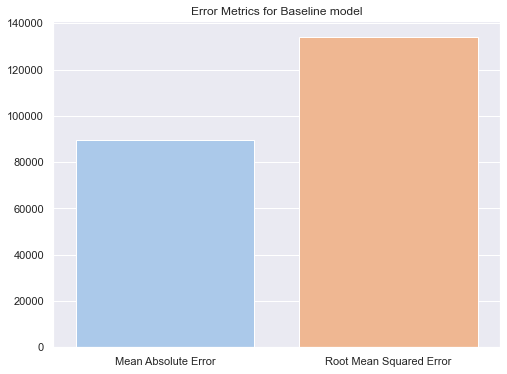

In [48]:
# first we set the baseline predictions
yhat_baseline = np.full((ytest.shape[0]), median_price) 


# next we call the get metrics function to get the errors
baseline_errors = get_metrics(ytest, yhat_baseline, 'Baseline')

# then we proceed to plot the metrics
plot_metrics(baseline_errors, 'Baseline')

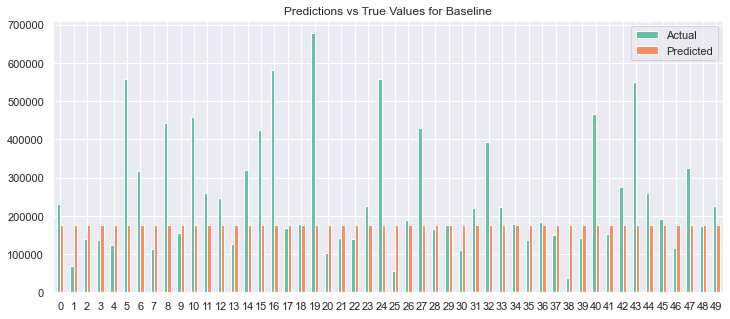

In [49]:
# plot the first 50 predictions vs true values
sns.set_palette('Set2')
plot_var(ytest, yhat_baseline, 'Baseline')

As we can see, our Baseline model is pretty well, naive. It is somewhat accurate for the median houses, but nowhere nearly accurate enough for us to make predictions with

Now that we a fully prepared dataset as well as a baseline model. We can get to building the different models. We'll build 3 different models and evaluate all 3 before choosing the best one (with the lowest error):

1. Random Forest
2. Support Vector Machine
3. Multi-Layer Perceptron (Neural Network)

- All the models will be built using a Grid Search method to identify the best hyperparameter combination (where a model is fitted and trained for every hyperparameter combination specified)

- We will be using a 10 fold cross-validations strategy in each of our grid search to determine scores

- We will be using a mean squared error method to identify the error

### 5.2 Initial Decision Tree

This decision tree will act as a preliminary model to help us understand the features within our dataset even further

In [50]:
# lets try our decision tree regressor
from sklearn.tree import DecisionTreeRegressor

# instantiate the decision tree object
decision_tree = DecisionTreeRegressor(max_depth=7, min_samples_split=2, random_state=7)

# fit the decision tree
decision_tree.fit(xtrain,ytrain)


DecisionTreeRegressor(max_depth=7, random_state=7)

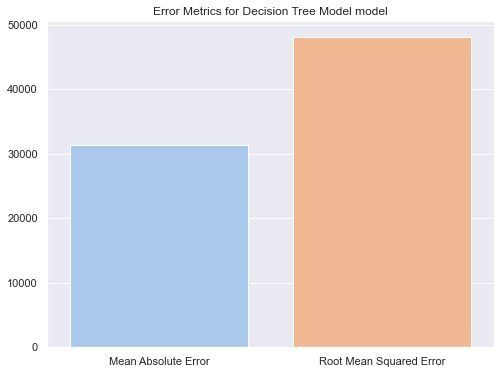

In [51]:
# get the predictions for our decision tree model on the test set
yhat_dt = decision_tree.predict(xtest) 


# next we call the get metrics function to get the errors
dt_errors = get_metrics(ytest, yhat_dt, 'Decision Tree')

# then we proceed to plot the metrics
plot_metrics(dt_errors, 'Decision Tree Model')

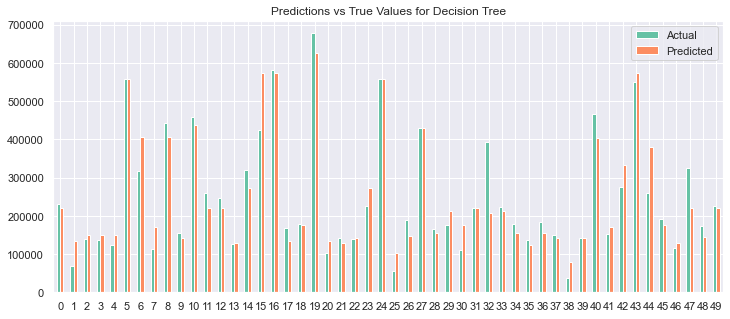

In [52]:
plot_var(ytest, yhat_dt, 'Decision Tree')

Assessing the feature importances

In [53]:
# get the feature importances
dt_importance = decision_tree.feature_importances_
feat_label = xtest.columns
indices = np.argsort(dt_importance)[::-1]

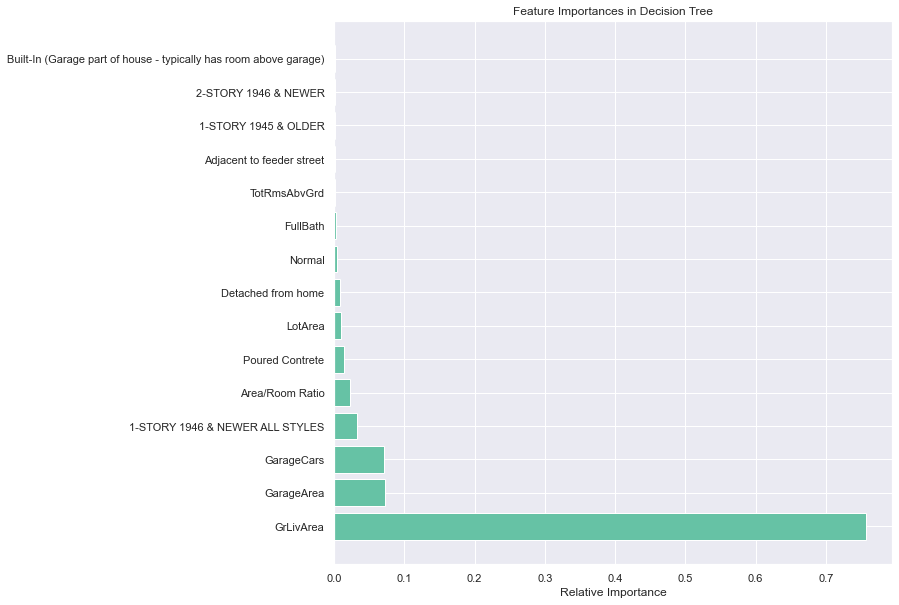

In [54]:
# set number of features 
num_features = 15

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances in Decision Tree')

# only visualize the top 15 features
plt.barh(range(num_features), dt_importance[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

> Quick note on feature importance - The decision tree considers every variable (including the dummies) as seperate features, as such feature importance is also provided accordingly

Our initial decision tree seems to mirror the actual house prices closely from the test set. Even though simplistic, it seems the Decision tree has learned enough to be considered reliable

We can see that the decision tree considers the Living area to be the most important factor in the entire model followed closely by Garage area and cars. An encouraging sign is that our Engineered Feature (Area/Room Ratio) is also considered important. However, the potential over-reliance on Living Area to make this decision may not be the most optimal, lets test out the other models.

### 5.3 Random Forest

In [55]:
# import the grid search
from sklearn.model_selection import GridSearchCV
from sklearnex.ensemble import RandomForestRegressor



# we have to specify the number of hyperparameters we want to test
# we do this using a parameter grid
# n_estimators refer to number of trees in a random forest
param_grid = {'n_estimators': [10, 50, 100, 250, 500],
            'max_depth': [4, 6, 8, None]}

rf = RandomForestRegressor()


# define our grid search
rf_grid_search = GridSearchCV(rf, param_grid, cv=10,
                            scoring='neg_root_mean_squared_error',
                            return_train_score=True)

# fit the model to our data
rf_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8, None],
                         'n_estimators': [10, 50, 100, 250, 500]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [56]:
print_cv_results(rf_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
14,"{'max_depth': 8, 'n_estimators': 500}",-20563.140195,-38206.005437,-85.798497
18,"{'max_depth': None, 'n_estimators': 250}",-14836.166451,-38295.814141,-158.124727
16,"{'max_depth': None, 'n_estimators': 50}",-15420.740659,-38334.497029,-148.590505
12,"{'max_depth': 8, 'n_estimators': 100}",-20813.130968,-38421.834205,-84.603817
13,"{'max_depth': 8, 'n_estimators': 250}",-20827.388028,-38506.663977,-84.884749
19,"{'max_depth': None, 'n_estimators': 500}",-14728.107976,-38604.660767,-162.115547
11,"{'max_depth': 8, 'n_estimators': 50}",-21180.145150,-38668.105887,-82.567710
17,"{'max_depth': None, 'n_estimators': 100}",-14800.393829,-38698.000651,-161.466020
9,"{'max_depth': 6, 'n_estimators': 500}",-26248.977849,-39489.798552,-50.443186
8,"{'max_depth': 6, 'n_estimators': 250}",-26351.274688,-39622.394155,-50.362343


Our best result shows a root mean error of about 38,558. Better than the baseline model by far and also somewhat better than the decision tree model. However the most interesting thing here is the fact that the random forest with the least estimators (trees) is the one that won out. At the same time we do see a big difference in the mean train and test scores, which may indicate somewhat poor generalization

> Quick note: the train and test scores refer to the Cross-Validation folds used rather than the training and test sets. All of the above operations are on the training sets so we'll still need to evaluate the model on the actual testing set later

Anyways we continue on to evaluate the best Random Forest model

In [57]:
# save the best estimator from the grid search
best_rf = rf_grid_search.best_estimator_

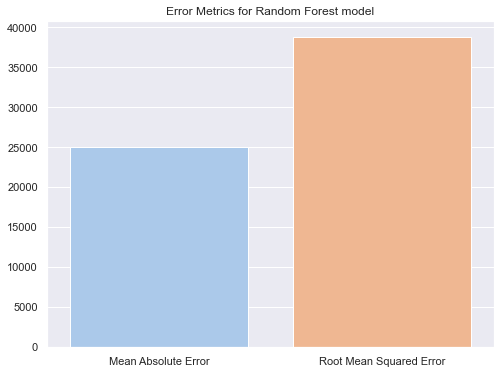

In [58]:
# get the predictions from our best random forest modle
yhat_rf = best_rf.predict(xtest)

rf_metrics = get_metrics(ytest, yhat_rf, 'Random Forest')

plot_metrics(rf_metrics, 'Random Forest')

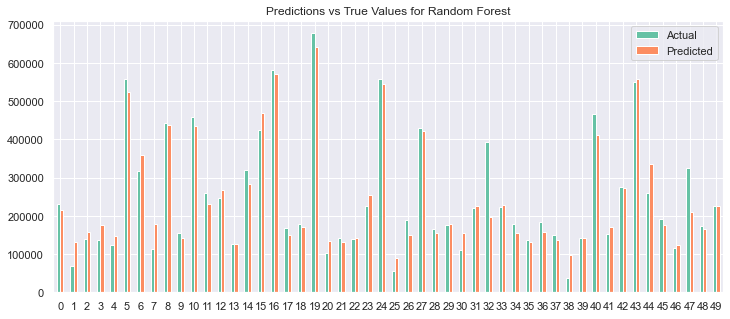

In [59]:
# plot the prediction variance
plot_var(ytest, yhat_rf, 'Random Forest')

Overall, the model seems to be of good quality and it seems to closely mirror the true values in the testing set. There are some noticeable deviations here and there but mostly seems good. Definitely usable for our purpose as we do not see too many occurences of deviations. The purpose is less so to get the prices exactly right, but more to predict in the same vicinity.

In [60]:
# get the feature importances
rf_importance = best_rf.feature_importances_
feat_label = xtest.columns
indices = np.argsort(rf_importance)[::-1]

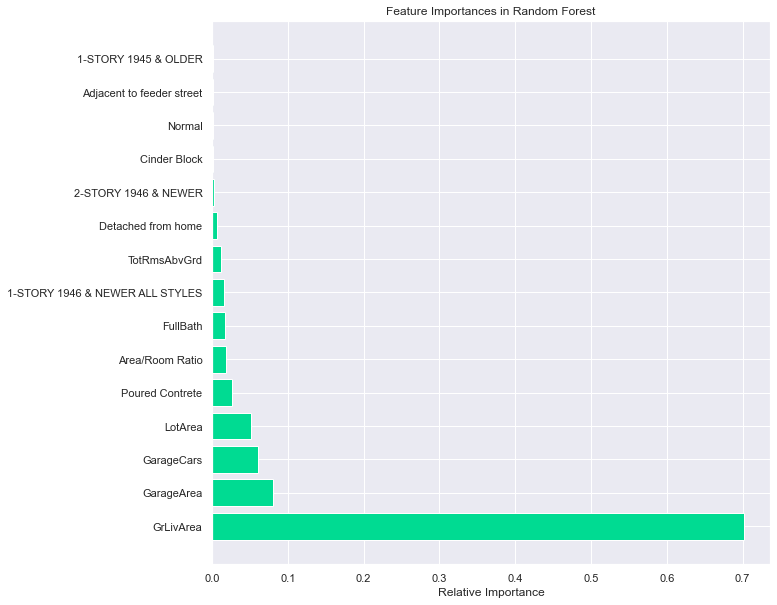

In [61]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='winter_r')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances in Random Forest')

# only visualize the top 15 features
plt.barh(range(num_features), rf_importance[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

We see from the feature importances that the most important factor considered for the random forest model is the living area similar to the decision tree. Overall almost all of the factors important in the decision tree seem to be important in the random forest with only slight differences

###

### 5.3 Support Vector Regressor

In [62]:
# first we import the support vector regressor class
from sklearn.svm import SVR

# instantiate the support vector class with the radial basis function
svr = SVR()

# set the parameters for our support vector regressor 
param_grid = [{'C': [0.01, 0.1, 1, 10, 100,],
 'gamma': ["scale", "auto", 0.01, 0.1, 1, 3, 5, 10],
 'kernel':['rbf', 'linear']
 },]

# define the grid search parameters
sv_grid_search = GridSearchCV(svr, param_grid, cv=10, scoring='neg_root_mean_squared_error',
                                return_train_score=True)


# now lets train our dataset
sv_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['scale', 'auto', 0.01, 0.1, 1, 3, 5, 10],
                          'kernel': ['rbf', 'linear']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [63]:
print_cv_results(sv_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
79,"{'C': 100, 'gamma': 10, 'kernel': 'linear'}",-75004.210929,-74263.781039,0.987184
75,"{'C': 100, 'gamma': 3, 'kernel': 'linear'}",-75004.210929,-74263.781039,0.987184
65,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}",-75004.210929,-74263.781039,0.987184
69,"{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}",-75004.210929,-74263.781039,0.987184
71,"{'C': 100, 'gamma': 0.1, 'kernel': 'linear'}",-75004.210929,-74263.781039,0.987184
...,...,...,...,...
28,"{'C': 0.1, 'gamma': 5, 'kernel': 'rbf'}",-132616.787474,-131332.876215,0.968136
30,"{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}",-132616.791707,-131332.884745,0.968133
10,"{'C': 0.01, 'gamma': 3, 'kernel': 'rbf'}",-132616.856233,-131332.893319,0.968175
12,"{'C': 0.01, 'gamma': 5, 'kernel': 'rbf'}",-132616.857583,-131332.894899,0.968175


There's 80 combinations that have been trained here. We can see that our Linear kernel models perform better than the radial basis function kernel models across the board. Another advantage of the Support Vector Regressor is the very good generalization we're observing. Nonetheless, despite performance being better than the baseline significantly, the error is almost twice as big as the Random Forest model.

In [64]:
# save the best svm estimator
best_svr = sv_grid_search.best_estimator_

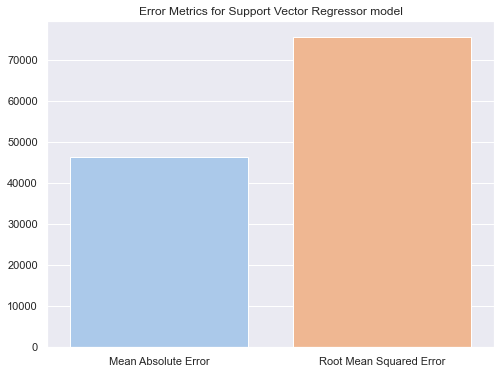

In [65]:
# get the predictions for the best svr model
yhat_svr = best_svr.predict(xtest)

# save the metrics for
svr_metrics = get_metrics(ytest, yhat_svr, 'Support Vector Regressor')

# plot the accuracy scores
plot_metrics(svr_metrics, 'Support Vector Regressor')

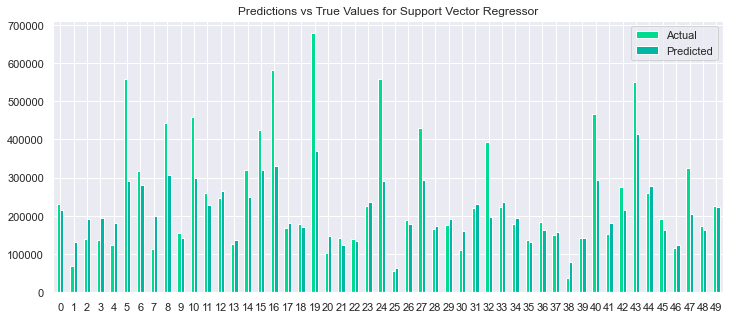

In [66]:
plot_var(ytest, yhat_svr, 'Support Vector Regressor')

We see here that our Support Vector Regressor model has an issue in that it severely under-estimates higher house prices by a large margin, and this happens quite frequently. This is exactly the sort of occurrence we would like not to have seen. With the error as well as the significant deviations, our Support Vector Regressor does not seem to be cut out for it

In [67]:
# get the relative size of squared coefficients (biggest coefficients will be set as 1) 
svm_weights = (best_svr.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()
indices = np.argsort(svm_weights)[::-1]

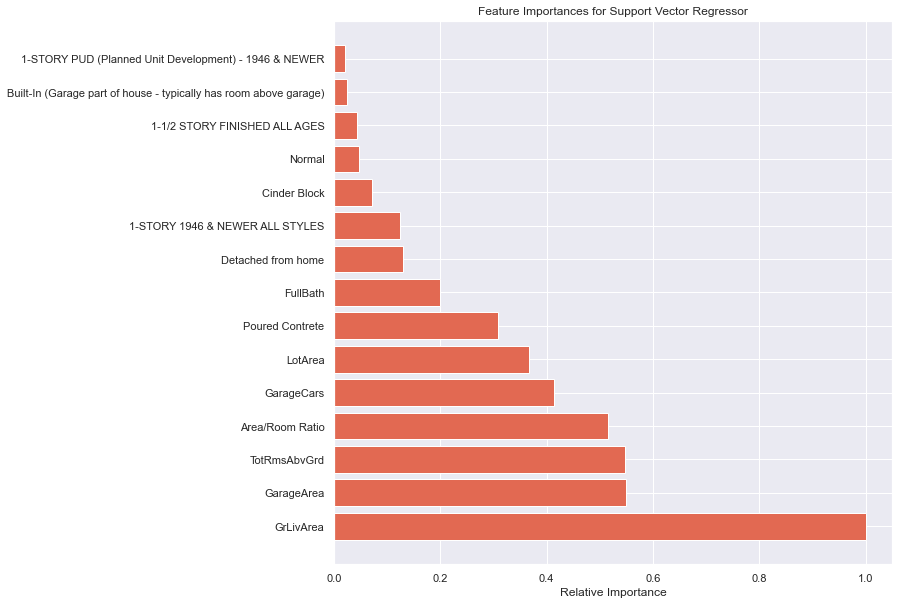

In [68]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='coolwarm_r')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances for Support Vector Regressor')

# only visualize the top 15 features
plt.barh(range(num_features), svm_weights[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Relative Importance')
plt.show()

### 5.4 Multi-Layer Perceptron (Neural Network)

In [69]:
# next up we'll try out the multi-layer perceptron
from sklearn.neural_network import MLPRegressor


# instantiate our MLPClassifier
mlpreg = MLPRegressor(solver='lbfgs', random_state=7)

# define the grid search parameters
param_grid = [
    {   
        'alpha': [0.001 ,0.01, 0.1, 1],
        'activation': ['logistic', 'identity', 'tanh'],
        'learning_rate': ['constant', 'invscaling', 'adaptive']
    },
]

# define the grid search parameters
mlp_grid_search = GridSearchCV(mlpreg, param_grid, cv=10, 
                              scoring='neg_root_mean_squared_error',
                              return_train_score=True)

# fit the neural network to our data
mlp_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=MLPRegressor(random_state=7, solver='lbfgs'),
             param_grid=[{'activation': ['logistic', 'identity', 'tanh'],
                          'alpha': [0.001, 0.01, 0.1, 1],
                          'learning_rate': ['constant', 'invscaling',
                                            'adaptive']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [70]:
print_cv_results(mlp_grid_search, col_width=100)

,params,mean_train_score,mean_test_score,"diff, %"
3,"{'activation': 'logistic', 'alpha': 0.01, 'learning_rate': 'constant'}",-51250.093311,-52971.775293,-3.359373
4,"{'activation': 'logistic', 'alpha': 0.01, 'learning_rate': 'invscaling'}",-51250.093311,-52971.775293,-3.359373
5,"{'activation': 'logistic', 'alpha': 0.01, 'learning_rate': 'adaptive'}",-51250.093311,-52971.775293,-3.359373
6,"{'activation': 'logistic', 'alpha': 0.1, 'learning_rate': 'constant'}",-50464.984918,-53339.866271,-5.696784
7,"{'activation': 'logistic', 'alpha': 0.1, 'learning_rate': 'invscaling'}",-50464.984918,-53339.866271,-5.696784
8,"{'activation': 'logistic', 'alpha': 0.1, 'learning_rate': 'adaptive'}",-50464.984918,-53339.866271,-5.696784
12,"{'activation': 'identity', 'alpha': 0.001, 'learning_rate': 'constant'}",-49824.520610,-53385.280156,-7.146601
14,"{'activation': 'identity', 'alpha': 0.001, 'learning_rate': 'adaptive'}",-49824.520610,-53385.280156,-7.146601
13,"{'activation': 'identity', 'alpha': 0.001, 'learning_rate': 'invscaling'}",-49824.520610,-53385.280156,-7.146601
18,"{'activation': 'identity', 'alpha': 0.1, 'learning_rate': 'constant'}",-49824.395113,-53389.960012,-7.156263


What we can see from our neural networks is that the identity activation function works better than the rest accross the board. Further lower levels of alpha are also seen to be associated with better performance. We note that the accuracy is somewhat lower than our Random Forest. However, the generalization is observed to be much better with no signs of overfitting the data.

In [71]:
# save the best svm estimator
best_mlp = mlp_grid_search.best_estimator_

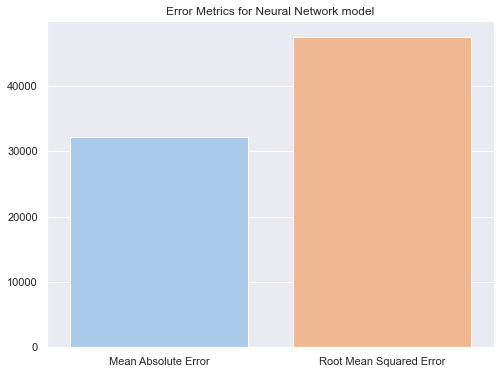

In [72]:
# get the prediction for our multi-layer perceptron
yhat_mlp = best_mlp.predict(xtest)

# get the metrics for the mlp model
mlp_metrics = get_metrics(ytest, yhat_mlp, 'Neural Network')

# plot the metrics
plot_metrics(mlp_metrics, 'Neural Network')

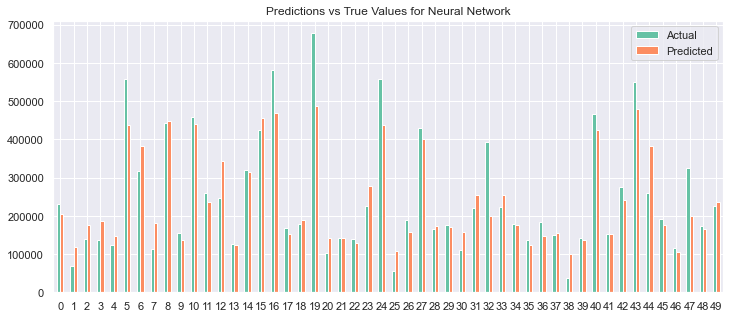

In [80]:
sns.set_palette(palette='Set2')

# plot the variance predictions
plot_var(ytest, yhat_mlp, 'Neural Network')


The MLP neural network also works similar to our random forest in that the predictions mirror the actual values closely. Some instances of underestimation is observed for significantly higher values, which indicates that the model cannot adequately capture whatever factor is leading to such high prices and we may be missing a piece somewhere

In [74]:
# now lets look at the feature importance of our MLP model
# we'll be using what is known as permuatation importance

# import the permutation importance class
from sklearn.inspection import permutation_importance

# calculate the permutation feature importance for Multi-Layer Perceptron
mlp_importance = permutation_importance(best_mlp, xtest, ytest,
                                        n_repeats=15, random_state=7)

In [75]:
# set the data required to plot 
indices = mlp_importance.importances_mean.argsort()[::-1]

# set the average importance values obtained from the mlp importance
mlpimportance = mlp_importance.importances_mean

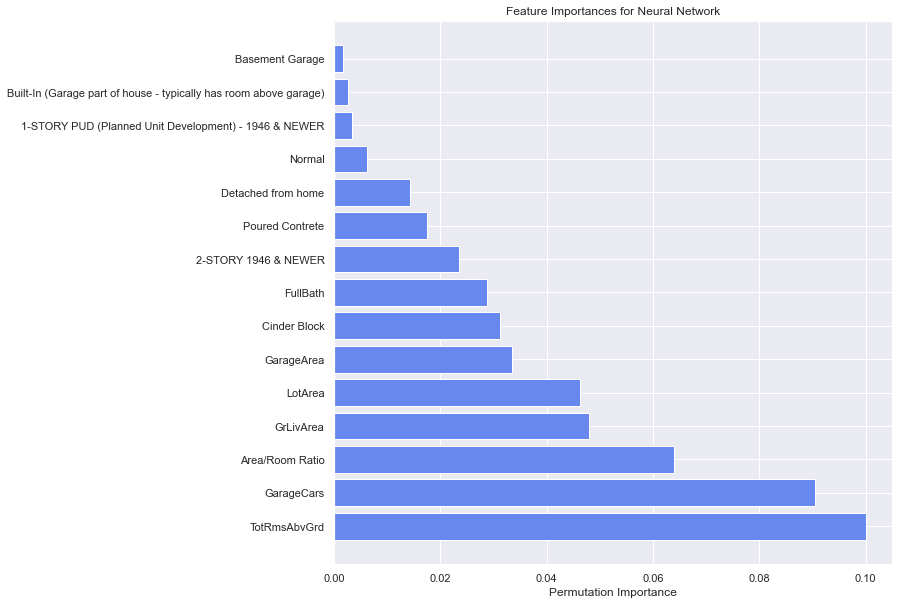

In [76]:
# set number of features 
num_features = 15

# set the theme for sns
sns.set_theme(style='darkgrid', palette='coolwarm')

# plot the relative importances
plt.figure(figsize=(10,10))
plt.title('Feature Importances for Neural Network')

# only visualize the top 10 features
plt.barh(range(num_features), mlpimportance[indices[:num_features]], align='center')
plt.yticks(range(num_features), [feat_label[i] for i in indices[:num_features]])
plt.xlabel('Permutation Importance')
plt.show()

### Comparing all of our different models

In [77]:
# first lets combine the accuracy metrics of all of our models into one dataframe
accuracy = pd.concat([baseline_errors, dt_errors,
                    rf_metrics, svr_metrics, mlp_metrics], axis=0)

accuracy.head()

,Mean Absolute Error,Root Mean Squared Error
Baseline,89348.161399,134222.983712
Decision Tree,31388.490433,48148.064480
Random Forest,24993.145635,38856.500323
Support Vector Regressor,46325.127825,75608.104618
Neural Network,32122.066717,47562.478304


Text(0.5, 1.0, 'Accuracy Metrics for all Models')

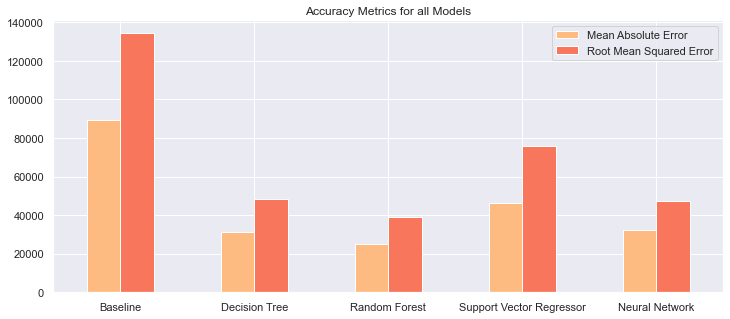

In [82]:
# then we plot the accuracy metrics in a bar chart
sns.set_palette(palette='magma_r')
ax = accuracy.plot(figsize=(12,5), kind='bar', rot=0)
ax.set_title('Accuracy Metrics for all Models')